##Entendimiento del problema

Ser capaces de predecir la presencia de una enfermedad de alto riesgo como lo es la artritis reumatoide, a partir de los datos médicos del paciente es vital para la medicina ya que proporcionan un diagnóstico temprano y por lo tanto, un tratamiento efectivo. Debido a este problema, el Machine Learning ha salido como una herramienta prometedora al momento de mejorar la precisión del diagnóstico. Por lo que este proyecto tiene como objetivo principal diseñar y desarrollar dos modelos de aprendizaje automático avanzado, los cuales se compararon usando ciertas características usadas para diagnosticar la enfermedad.


Debido a esto, el modelo que se obtendrá no solo beneficiará a los profesionales de la salud al mejorar la detección temprana y la precisión diagnóstico, sino que también puede tener un impacto significativo en la atención médica preventiva y personalizada, permitiendo así que las intervenciones sean más eficientes y mejorando los resultados de salud para los pacientes y posibles pacientes de esta enfermedad.

##Preparación y exploración de datos

In [ ]:
# Importar librerias (en caso de ser necesario)
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [ ]:
# Librerias básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libreria para analísis estadísticas
from scipy.stats import spearmanr

# Librerias para la técnicas de validación cruzada y separación de datos para
# entrenamiento y pruba
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

# Árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Librerias para el Ajuste de hiperparámetros para mejorar la precisión
from sklearn.model_selection import GridSearchCV

In [ ]:
# Importar el dataframe de los pacientes con y sin artritis creado.
df = pd.read_csv("artritis.csv")

display(df.head()) # Mostrar los 5 primeros
print()
display(df.info()) # Mostrar la información del df para observar si hay filas vacías

,Nombre,Edad,Género,Historial familiar,IMC,Tabaquismo,Actividad física,Exposición Contaminante,Anti-pcc,ANA,PCR,VSG,HLA,FR,Ácido Úrico,Serología-Lyme,Enfermo
0,Juan Pérez,35,Hombre,1,31.4,1,1,0,75.2,0,4.0,14.3,1,18.6,1,0,1
1,María González,45,Mujer,0,26.8,0,1,1,29.8,1,7.1,26.5,0,12.3,0,1,1
2,Luis Martínez,28,Hombre,1,22.7,1,0,0,14.9,0,8.5,18.2,1,5.4,1,0,0
3,Ana Rodríguez,52,Hombre,0,29.1,0,1,0,40.5,1,11.2,35.8,1,22.1,0,1,1
4,Carlos Sánchez,38,Mujer,1,24.6,1,1,1,60.3,0,6.3,21.7,0,15.2,1,0,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Nombre                   160 non-null    object 
 1   Edad                     160 non-null    int64  
 2   Género                   160 non-null    object 
 3   Historial familiar       160 non-null    int64  
 4   IMC                      160 non-null    float64
 5   Tabaquismo               160 non-null    int64  
 6   Actividad física         160 non-null    int64  
 7   Exposición Contaminante  160 non-null    int64  
 8   Anti-pcc                 160 non-null    float64
 9   ANA                      160 non-null    int64  
 10  PCR                      160 non-null    float64
 11  VSG                      160 non-null    float64
 12  HLA                      160 non-null    int64  
 13  FR                       160 non-null    float64
 14  Ácido Úrico              

None

In [ ]:
# Eliminar todas las filas vacías
df = df.dropna()

# Eliminar columna nombre (no necesaria en el analísis que estamos haciendo)
df = df.drop('Nombre', axis=1)
df['Enfermo'] = df['Enfermo'].astype(int)

display(df.head())
print()
display(df.info())

,Edad,Género,Historial familiar,IMC,Tabaquismo,Actividad física,Exposición Contaminante,Anti-pcc,ANA,PCR,VSG,HLA,FR,Ácido Úrico,Serología-Lyme,Enfermo
0,35,Hombre,1,31.4,1,1,0,75.2,0,4.0,14.3,1,18.6,1,0,1
1,45,Mujer,0,26.8,0,1,1,29.8,1,7.1,26.5,0,12.3,0,1,1
2,28,Hombre,1,22.7,1,0,0,14.9,0,8.5,18.2,1,5.4,1,0,0
3,52,Hombre,0,29.1,0,1,0,40.5,1,11.2,35.8,1,22.1,0,1,1
4,38,Mujer,1,24.6,1,1,1,60.3,0,6.3,21.7,0,15.2,1,0,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Edad                     160 non-null    int64  
 1   Género                   160 non-null    object 
 2   Historial familiar       160 non-null    int64  
 3   IMC                      160 non-null    float64
 4   Tabaquismo               160 non-null    int64  
 5   Actividad física         160 non-null    int64  
 6   Exposición Contaminante  160 non-null    int64  
 7   Anti-pcc                 160 non-null    float64
 8   ANA                      160 non-null    int64  
 9   PCR                      160 non-null    float64
 10  VSG                      160 non-null    float64
 11  HLA                      160 non-null    int64  
 12  FR                       160 non-null    float64
 13  Ácido Úrico              160 non-null    int64  
 14  Serología-Lyme           

None

In [ ]:
# Convertir en variable categórica genero en binario
df["Género"] = df["Género"].map({"Hombre": 1, "Mujer": 0})
display(df.head()) # Imprimir los 5 primeros

,Edad,Género,Historial familiar,IMC,Tabaquismo,Actividad física,Exposición Contaminante,Anti-pcc,ANA,PCR,VSG,HLA,FR,Ácido Úrico,Serología-Lyme,Enfermo
0,35,1,1,31.4,1,1,0,75.2,0,4.0,14.3,1,18.6,1,0,1
1,45,0,0,26.8,0,1,1,29.8,1,7.1,26.5,0,12.3,0,1,1
2,28,1,1,22.7,1,0,0,14.9,0,8.5,18.2,1,5.4,1,0,0
3,52,1,0,29.1,0,1,0,40.5,1,11.2,35.8,1,22.1,0,1,1
4,38,0,1,24.6,1,1,1,60.3,0,6.3,21.7,0,15.2,1,0,0


In [ ]:
# Descripciones estadísticas
df.describe(include = 'all')

,Edad,Género,Historial familiar,IMC,Tabaquismo,Actividad física,Exposición Contaminante,Anti-pcc,ANA,PCR,VSG,HLA,FR,Ácido Úrico,Serología-Lyme,Enfermo
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,41.906250,0.506250,0.631250,28.700000,0.618750,0.750000,0.637500,50.526250,0.537500,7.946875,25.856250,0.481250,16.075000,0.625000,0.375000,0.650000
std,6.779359,0.501531,0.483981,2.033369,0.487219,0.434372,0.482231,9.755518,0.500157,1.427930,3.796932,0.501217,2.843375,0.485643,0.485643,0.478467
min,28.000000,0.000000,0.000000,19.800000,0.000000,0.000000,0.000000,10.200000,0.000000,4.000000,14.300000,0.000000,3.900000,0.000000,0.000000,0.000000
25%,36.750000,0.000000,0.000000,27.500000,0.000000,0.750000,0.000000,44.175000,0.000000,6.775000,22.400000,0.000000,13.700000,0.000000,0.000000,0.000000
50%,41.500000,1.000000,1.000000,28.500000,1.000000,1.000000,1.000000,49.800000,1.000000,8.100000,26.100000,0.000000,16.250000,1.000000,0.000000,1.000000
75%,47.250000,1.000000,1.000000,29.950000,1.000000,1.000000,1.000000,58.100000,1.000000,9.100000,28.400000,1.000000,17.825000,1.000000,1.000000,1.000000
max,55.000000,1.000000,1.000000,33.500000,1.000000,1.000000,1.000000,75.200000,1.000000,11.300000,37.900000,1.000000,26.700000,1.000000,1.000000,1.000000


In [ ]:
# Imprimir las relaciones estadísticas y correlación entre las variables:
'''
IMC, PCR, FR y Edad
'''
relaciones_estadisticas = ["IMC","PCR","FR","Edad"]

print("     -- Variables de estadística descriptivas --")
display(df[relaciones_estadisticas].describe())
print()
print("      -- Correlación entre variables --")
display(df[relaciones_estadisticas].corr())

     -- Variables de estadística descriptivas --


,IMC,PCR,FR,Edad
count,160.000000,160.000000,160.000000,160.000000
mean,28.700000,7.946875,16.075000,41.906250
std,2.033369,1.427930,2.843375,6.779359
min,19.800000,4.000000,3.900000,28.000000
25%,27.500000,6.775000,13.700000,36.750000
50%,28.500000,8.100000,16.250000,41.500000
75%,29.950000,9.100000,17.825000,47.250000
max,33.500000,11.300000,26.700000,55.000000



      -- Correlación entre variables --


,IMC,PCR,FR,Edad
IMC,1.000000,0.077763,0.133496,0.210694
PCR,0.077763,1.000000,0.776885,0.439583
FR,0.133496,0.776885,1.000000,0.421062
Edad,0.210694,0.439583,0.421062,1.000000


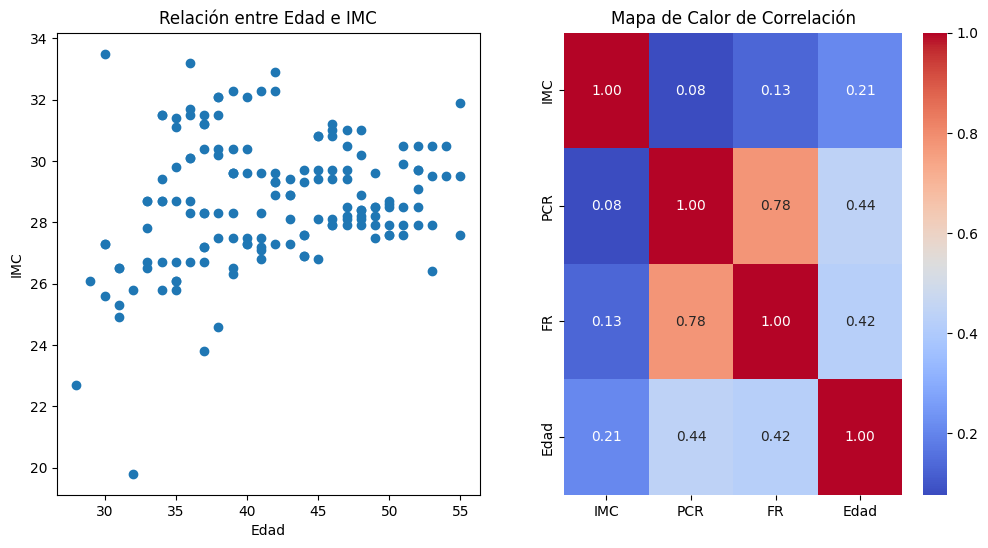

In [ ]:
# Mostramos la relación en un gráfico de las variables Edad e IMC usando un gráfico de puntos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Edad'], df['IMC'])
plt.xlabel('Edad')
plt.ylabel('IMC')
plt.title('Relación entre Edad e IMC')

# Mostramos la relación en un gráfico de las variables dichas en un mapa de calor
plt.subplot(1, 2, 2)
correlation_matrix = df[relaciones_estadisticas].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')

plt.show()

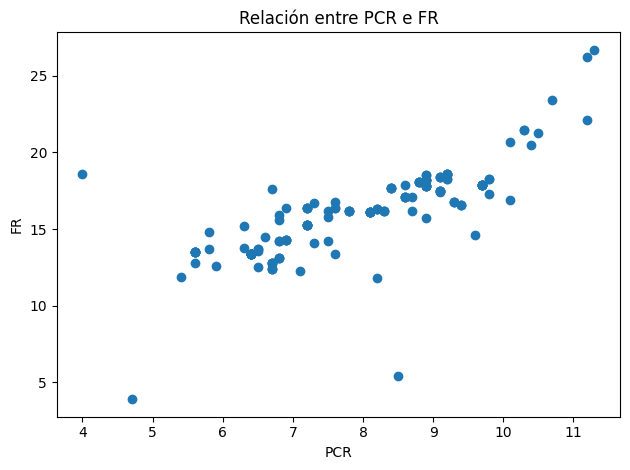

In [ ]:
# Mostramos la relación entre dos variables importantes como el PCR y el FR
plt.scatter(df['PCR'], df['FR'])
plt.xlabel('PCR')
plt.ylabel('FR')
plt.title('Relación entre PCR e FR')
plt.tight_layout()
plt.show()

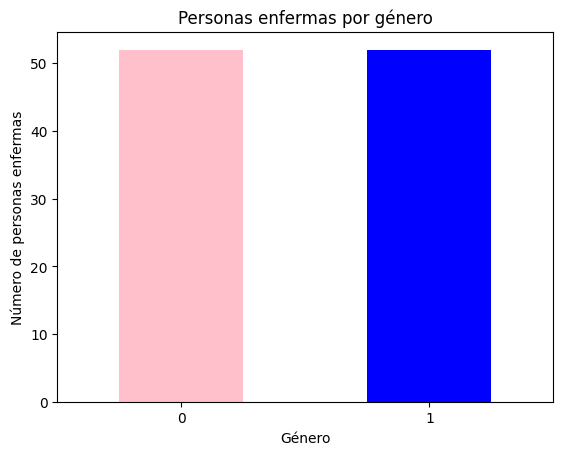

In [ ]:
# Agrupar por la columna "Género" y sumamos el número de personas enfermas en cada grupo
enfermos_genero = df.groupby('Género')['Enfermo'].sum()

# Graficar la diferencia entre el número de personas enfermas por género
enfermos_genero.plot(kind='bar', color=['pink', 'blue'])
plt.xlabel('Género')
plt.ylabel('Número de personas enfermas')
plt.title('Personas enfermas por género')
plt.xticks(rotation=0)
plt.show()

##Selección y entrenamiento del modelo

In [ ]:
# Definir las variables predictoras y la variable objetivo
x = df.iloc[:, :-1]  # Variables predictoras
y = df['Enfermo']  # Variable objetivo

# Mostrar las primeras filas de las variables predictoras
display(x.head())
print()
display(y.head())

,Edad,Género,Historial familiar,IMC,Tabaquismo,Actividad física,Exposición Contaminante,Anti-pcc,ANA,PCR,VSG,HLA,FR,Ácido Úrico,Serología-Lyme
0,35,1,1,31.4,1,1,0,75.2,0,4.0,14.3,1,18.6,1,0
1,45,0,0,26.8,0,1,1,29.8,1,7.1,26.5,0,12.3,0,1
2,28,1,1,22.7,1,0,0,14.9,0,8.5,18.2,1,5.4,1,0
3,52,1,0,29.1,0,1,0,40.5,1,11.2,35.8,1,22.1,0,1
4,38,0,1,24.6,1,1,1,60.3,0,6.3,21.7,0,15.2,1,0


0    1
1    1
2    0
3    1
4    0
Name: Enfermo, dtype: int64

In [ ]:
# Obtener las variables para el entrenamiento (test y prueba)
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state=0)
X_train.info() # Mostrar las informaciones de las variables objetivas de entrenamiento

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 54 to 47
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Edad                     128 non-null    int64  
 1   Género                   128 non-null    int64  
 2   Historial familiar       128 non-null    int64  
 3   IMC                      128 non-null    float64
 4   Tabaquismo               128 non-null    int64  
 5   Actividad física         128 non-null    int64  
 6   Exposición Contaminante  128 non-null    int64  
 7   Anti-pcc                 128 non-null    float64
 8   ANA                      128 non-null    int64  
 9   PCR                      128 non-null    float64
 10  VSG                      128 non-null    float64
 11  HLA                      128 non-null    int64  
 12  FR                       128 non-null    float64
 13  Ácido Úrico              128 non-null    int64  
 14  Serología-Lyme           128 no

###**Árbol de Decisión**

In [ ]:
'''
  Optimización del modelo de Árbol de Decisión
'''

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en un nodo hoja
}

# Crear el clasificador de árbol de decisión
tree_classifier = DecisionTreeClassifier(random_state=42)

# Realizar la búsqueda de cuadrícula utilizando validación cruzada
grid_search = GridSearchCV(estimator=tree_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params_dt = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params_dt}")

# Obtener la mejor precisión encontrada
best_accuracy_dt = grid_search.best_score_
print(f"Mejor precisión: {best_accuracy_dt}")

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mejor precisión: 0.7815384615384614


In [ ]:
# Pasar como **kwargs (argumentos posicionales dentro de diccionarios) los mejores hiperparámetros encontrados
mejor_arbol_para_clasificar = DecisionTreeClassifier(**best_params_dt)

# Entrenamiento del modelo
arbolArtritis = mejor_arbol_para_clasificar.fit(X_train,y_train)

mejor_arbol_para_clasificar.fit(X_train, y_train)
y_pred = mejor_arbol_para_clasificar.predict(X_test)

# Calculamos la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Árbol de Decisión: {precision}")

Precisión del modelo Árbol de Decisión: 0.78125


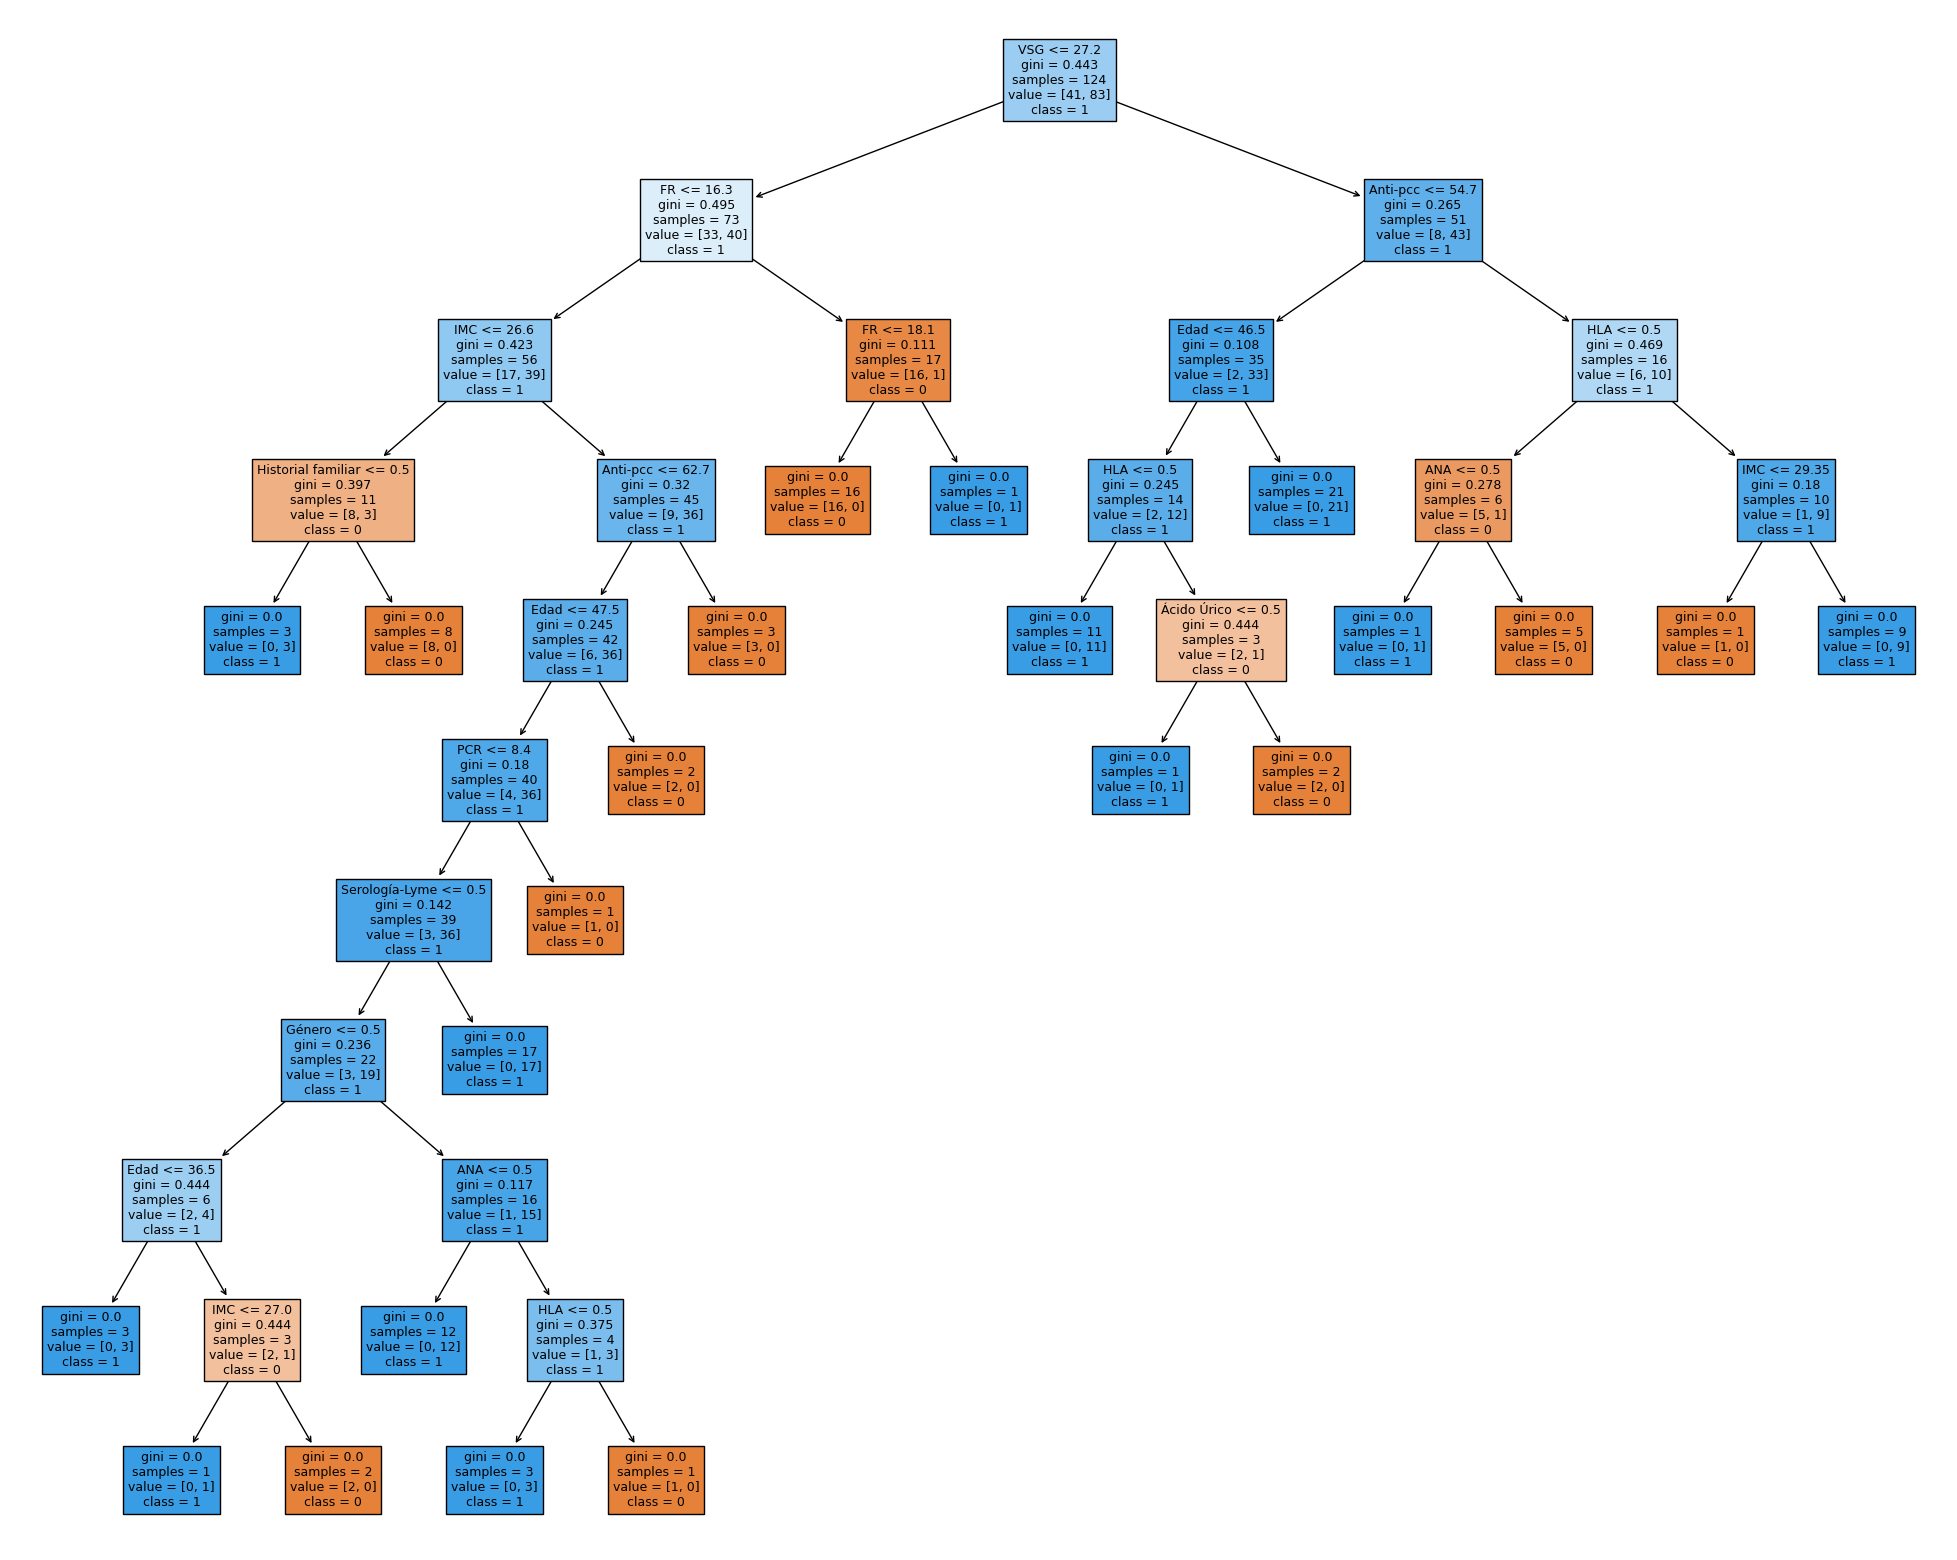

In [ ]:
# Crear una figura para mostrar el resultado del árbol de decisión
plt.figure(figsize=(25, 20))
tree.plot_tree(arbolArtritis, feature_names=x.columns, class_names=['0', '1'], filled=True)
plt.show()

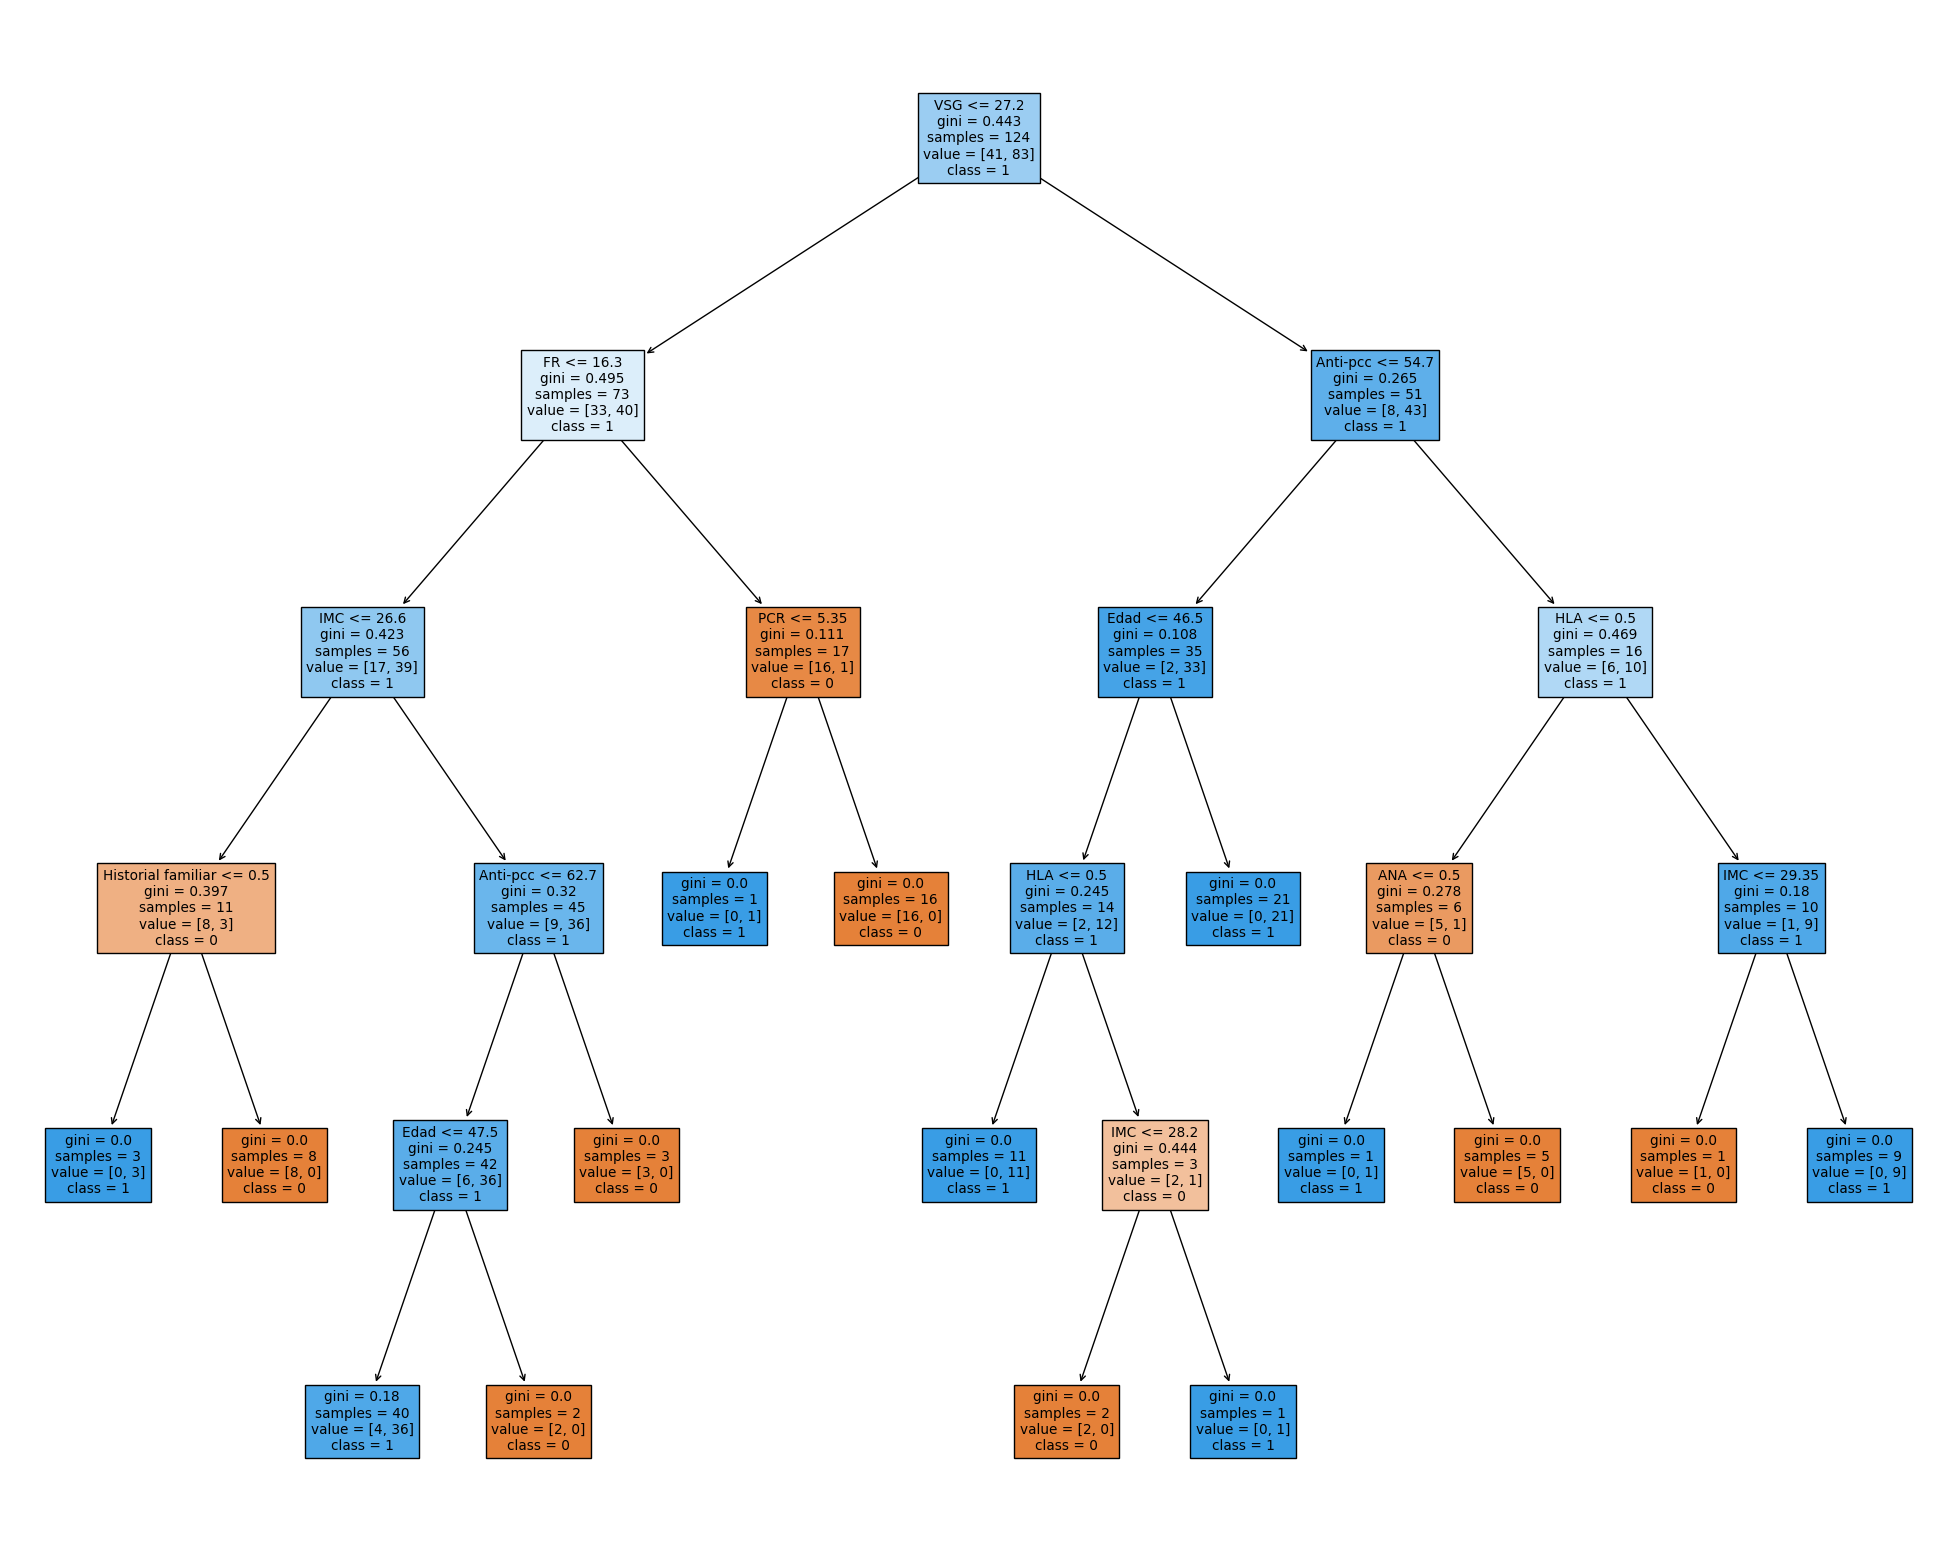

In [ ]:
# Árbol de decisión (de control)

arbol = DecisionTreeClassifier(max_depth=5) # Constructor del árbol de decisión
arbolArtritis = arbol.fit(X_train,y_train) # Entrenamiento del modelo, pero con hiperparámetros diferentes

plt.figure(figsize=(25, 20))
tree.plot_tree(arbolArtritis, feature_names=x.columns, class_names=['0', '1'], filled=True)
plt.show()

In [ ]:
# Utilización adecuada de técnicas de validación cruzada para evaluar y comparar el rendimiento de los modelos.
modelo = DecisionTreeClassifier()
k_fold = KFold(n_splits=3)  # Definir el número de pliegues K
puntajes = cross_val_score(modelo, X_train, y_train, cv=k_fold, scoring='accuracy')

print(f"Puntajes de Validación Cruzada: {puntajes}")
print("Precisión Promedio: %0.2f (± %0.2f)" % (puntajes.mean(), puntajes.std() * 2))

Puntajes de Validación Cruzada: [0.80952381 0.82926829 0.68292683]
Precisión Promedio: 0.77 (± 0.13)


###**Random Forest**

In [ ]:
# Datos del entrenamiento para el Random Forest
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size= 0.80, random_state= 40 )

In [ ]:
'''
  Optimización del modelo de Random Fores
'''

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 5, 10, 15],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en un nodo hoja
}

# Crear el clasificador Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Realizar la búsqueda de cuadrícula utilizando validación cruzada
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params_rf = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params_rf}")

# Obtener la mejor precisión encontrada
best_accuracy_rf = grid_search.best_score_
print(f"Mejor precisión: {best_accuracy_rf}")

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Mejor precisión: 0.8313333333333335


In [ ]:
# Pasar como **kwargs (argumentos posicionales dentro de diccionarios) los mejores hiperparámetros encontrados
mejor_random_forest_para_clasificar = RandomForestClassifier(**best_params_rf)

# Entrenar el modelo del Random Forest y hacer predicciones
mejor_random_forest_para_clasificar.fit(X_train, y_train)
y_pred = mejor_random_forest_para_clasificar.predict(X_test)

# Calculamos la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Random Forest: {precision}")

Precisión del modelo Random Forest: 0.96875


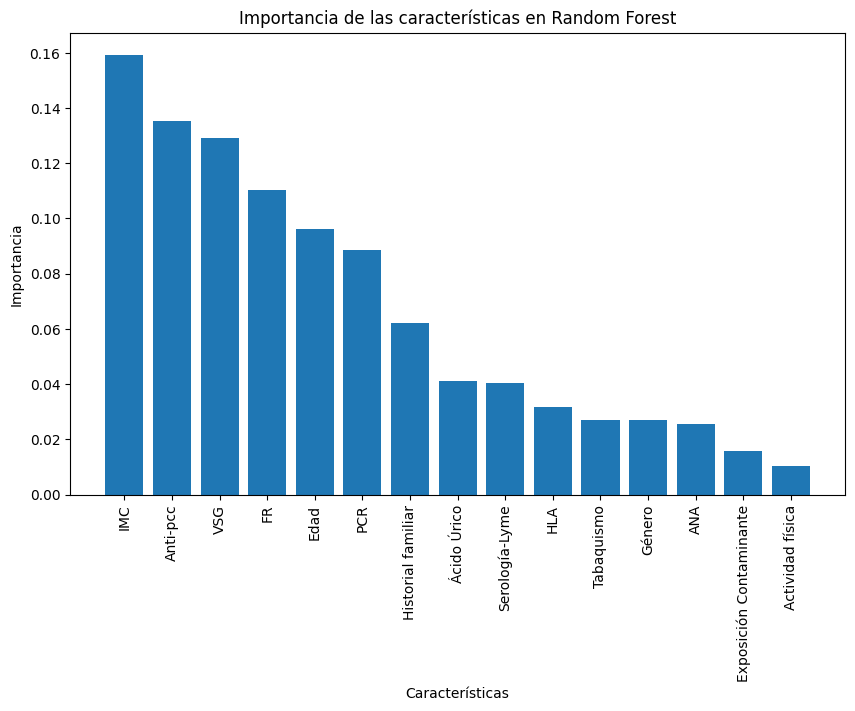

In [ ]:
# Obtener la importancia de las características desde el modelo
importances = mejor_random_forest_para_clasificar.feature_importances_

# Obtener el nombre de las características
feature_names = x.columns

# Ordenar las importancias y los nombres de las características en orden descendente
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Crear el gráfico de barras de la importancia de las características
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), sorted_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.title('Importancia de las características en Random Forest')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()

In [ ]:
# Utilización adecuada de técnicas de validación cruzada para evaluar y comparar el rendimiento de los modelos
modelo = RandomForestClassifier()
k_fold = KFold(n_splits=3)  # Definir el número de pliegues K
puntajes = cross_val_score(modelo, X_train, y_train, cv=k_fold, scoring='accuracy')

print(f"Puntajes de Validación Cruzada: {puntajes}")
print("Precisión Promedio: %0.2f (± %0.2f)" % (puntajes.mean(), puntajes.std() * 2))

Puntajes de Validación Cruzada: [0.85714286 0.73170732 0.82926829]
Precisión Promedio: 0.81 (± 0.11)


##Evaluación del modelo

Su utilizaron como métricas de evaluación la precisión, la cual es es una métrica que mide la proporción de predicciones correctas realizadas por el modelo sobre el total de predicciones realizadas. Además se uso los puntajes de validación cruzada, los cuales representan la precisión del modelo promediada en múltiples divisiones del conjunto de datos durante la validación cruzada.

Para el caso de la precisión, tanto el árbol de decisiones y el Random Forest tienen precisiones relativamente altas: 0.782 y 0.831 para el árbol de decisiones y el bosque aleatorio, respectivamente. Esto indica que ambos modelos son capaces de predecir correctamente la clase de los datos en una proporción significativa de los casos.

Sin embargo, la precisión promedio para el árbol de decisiones es de 0.77 con una desviación estándar de ±0.13, mientras que para el bosque aleatorio es de 0.81 con una desviación estándar de ±0.11. Aunque, ambos modelos muestran una variabilidad en la precisión entre las divisiones del conjunto de datos, en general, el bosque aleatorio tiende a tener un mejor rendimiento promedio.

Basándonos en las métricas proporcionadas, el random forest parece tener un rendimiento ligeramente superior en términos de precisión promedio en la validación cruzada. Además, el random forest generalmente tiende a tener un mejor rendimiento que un solo árbol de decisiones, ya que combina múltiples árboles para hacer predicciones, lo que reduce el riesgo de sobreajuste y aumenta la generalización del modelo.